# IMDB movie ratings prediction



# Akshay Deshpande A#20334764

The problem is to predict the user rating based on movie information. This is a classification problem involves feature selection and classification. The data set consists movie database consists of many different attributes about movies. For example, movie title, genre, actors/actresses, directors, company, year, etc. The data set also consists of User rating data(IMDB Scores): user ratings on different movies. The problem definition would be to predict the movie ratings based on the movie data frm IMDB. In order to predict (or classify) the movie ratings, we need to select the best feature for classification involving feature selection techniques.

In [156]:
import pandas as pd
import csv
import numpy as np

#Reading the dataset as the pandas dataframe
df = pd.read_csv('D:\Machine Learning\Akshay_Deshpande\movie_metadata.csv')
#Get the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

So as you can see that the "Movie Dataset" has __13-floating variables, 3-Intergers/Numeric variables, and 12-String type variable__. 

Now lets further look into the first 5 rows of the dataframe.

In [157]:
#Display the first 5 rows of the dataset
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [158]:
#Get the dimension of the dataset
df.shape

(5043, 28)

Now as you can see that the dataset has the __5043 rows__ and __28 columns__.
Which also means that it has __5043__ instances and __28__ features including the __target variable__ "IMDB_SCORE". In short we can use at max __27__ features to predict the target variable. 

Now lets visualize the __imdb_score__.

# Visualizing IMDB_SCORE , Target Variable


In [159]:
df['imdb_score'].dtypes

dtype('float64')

Hence you can see that the __imdb_score__ variable is a floating numeric so need to plot a __Histogram__ for the same.

We can use __Matplotlib__ to do the same. 

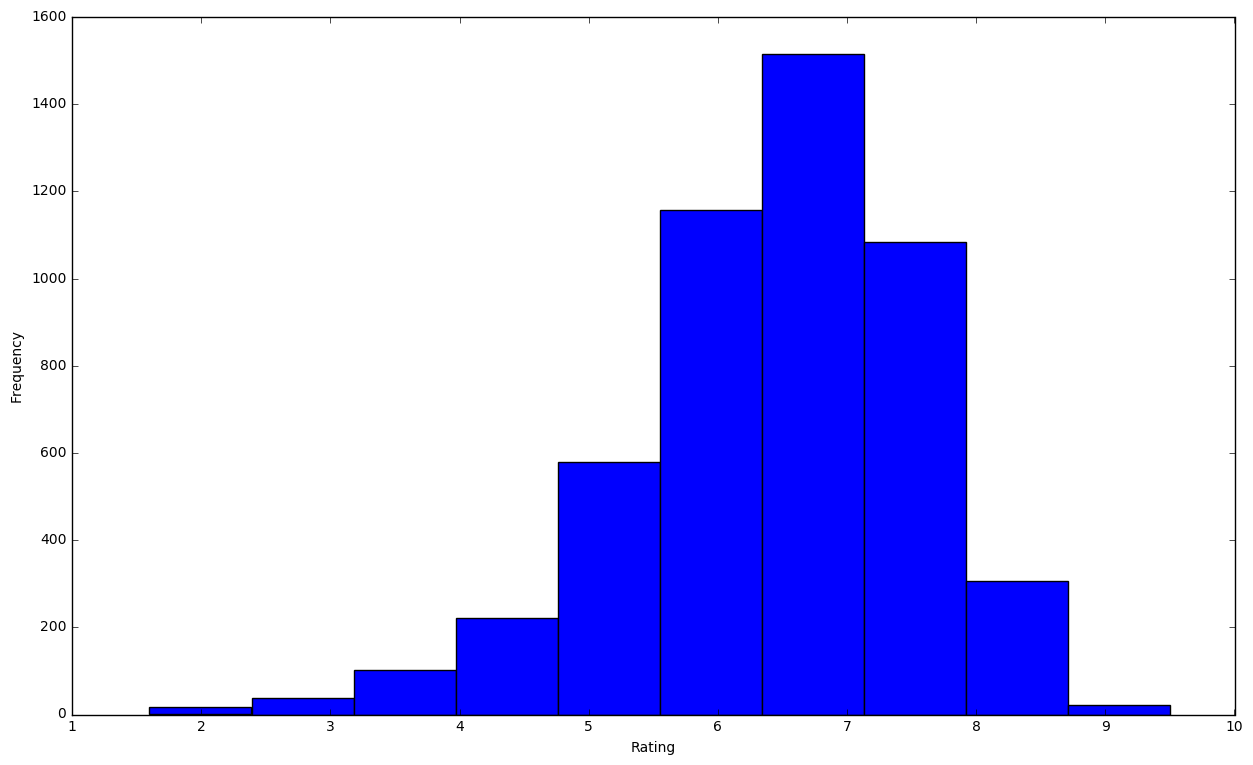

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
plt.hist(df['imdb_score'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

So as you can see that most of the movie ratings are between __6-7__ IMDB ratings. 

In [161]:
#Print the mean and variance of IMDB Score
print ("Mean of imdb_score - ", df['imdb_score'].mean())

Mean of imdb_score -  6.442137616498111


In [162]:
print ("Variance of imdb_score - ", df['imdb_score'].var())

Variance of imdb_score -  1.2658857113236914


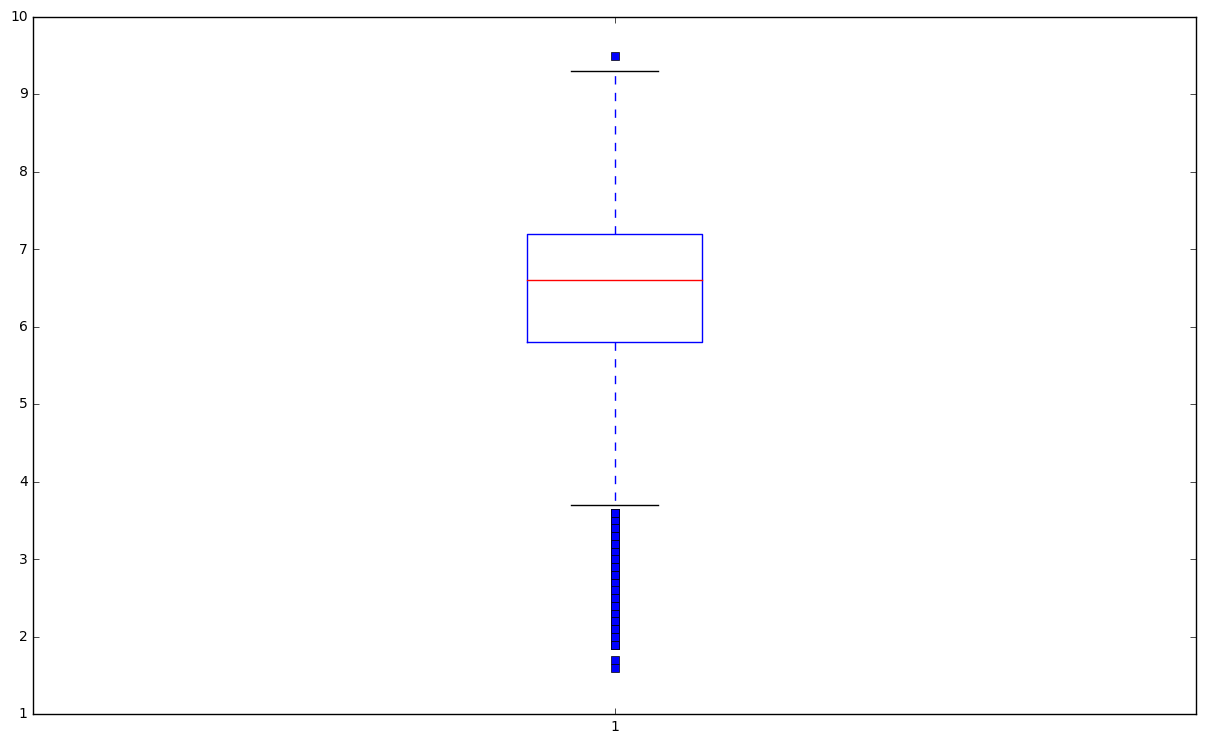

In [163]:
#Boxplot for the target variable
plt.figure(figsize=(15,9))
plt.boxplot(df['imdb_score'], 0, 'rs')
plt.show()

### Summary Statistics of the dataset

In [164]:
#Get the 5 point summary for each variable expect the string type variable
df.describe().transpose()

C:\Users\Akki\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,NaN,NaN,NaN,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,NaN,NaN,NaN,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,NaN,NaN,NaN,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,NaN,NaN,NaN,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,NaN,NaN,NaN,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,NaN,NaN,NaN,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.5,34359.0,96309.0,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.0,3090.0,13756.5,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,NaN,NaN,NaN,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,NaN,NaN,NaN,5.060000e+03


Rest which are not shown here are the string type variable which are not necessarily caterogical. Some of the string/object type variables are - 
1. Language
2. Country
3. Content Rating, etc.

We would try to visualize some like Content Rating and Country.

### Bar plot for Content rating

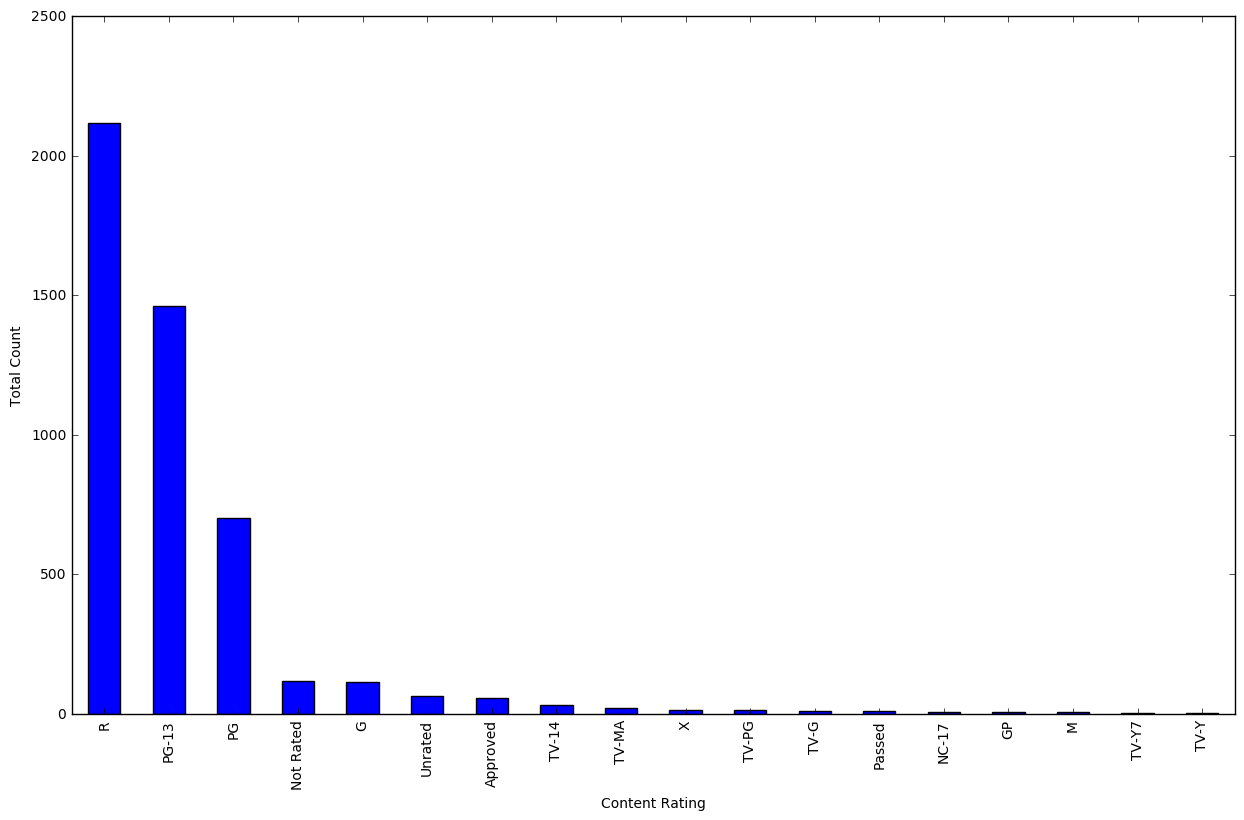

In [165]:
plt.figure(figsize=(15,9))
df['content_rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Total Count')

### Bar Plot for Country

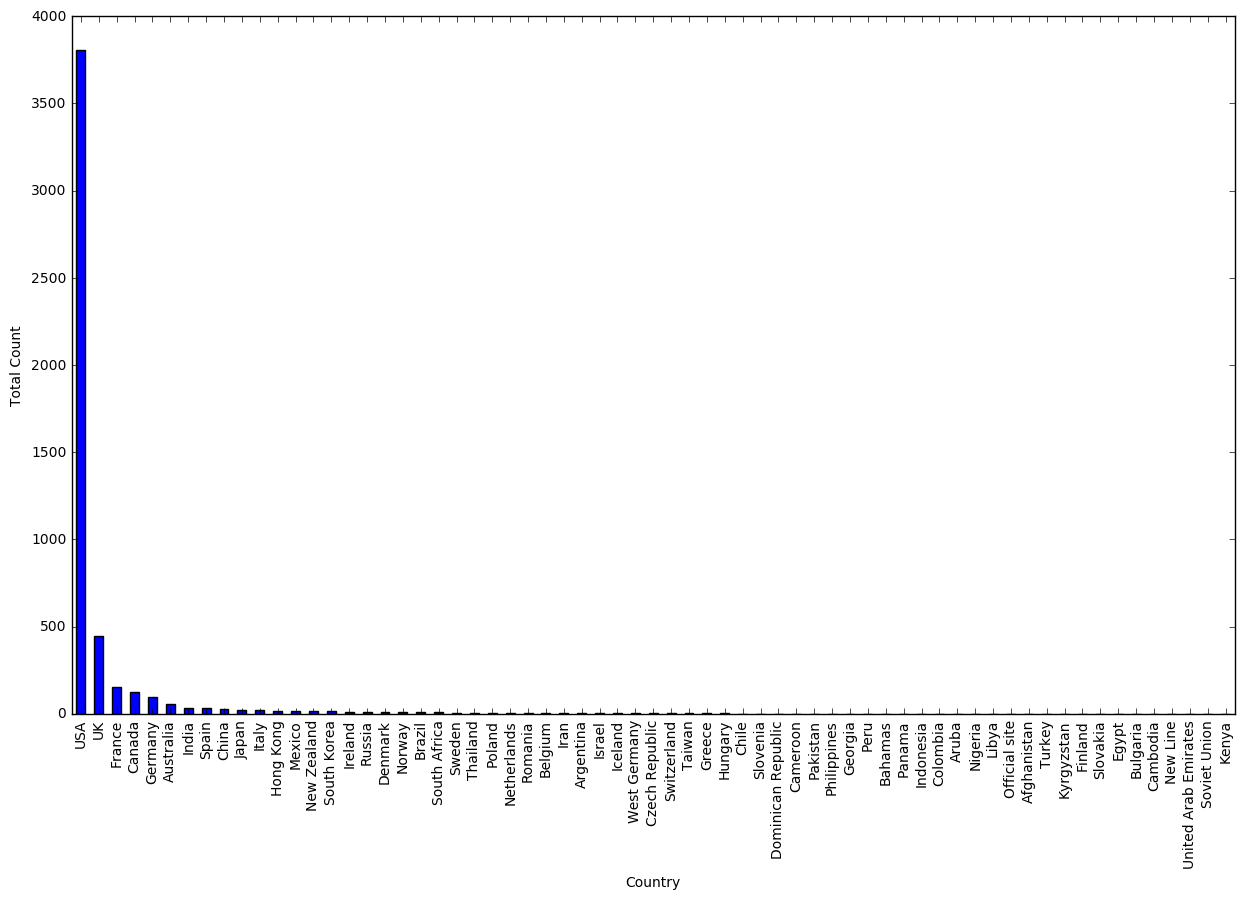

In [166]:
plt.figure(figsize=(15,9))
df['country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Count')

### Bar Plot for Language

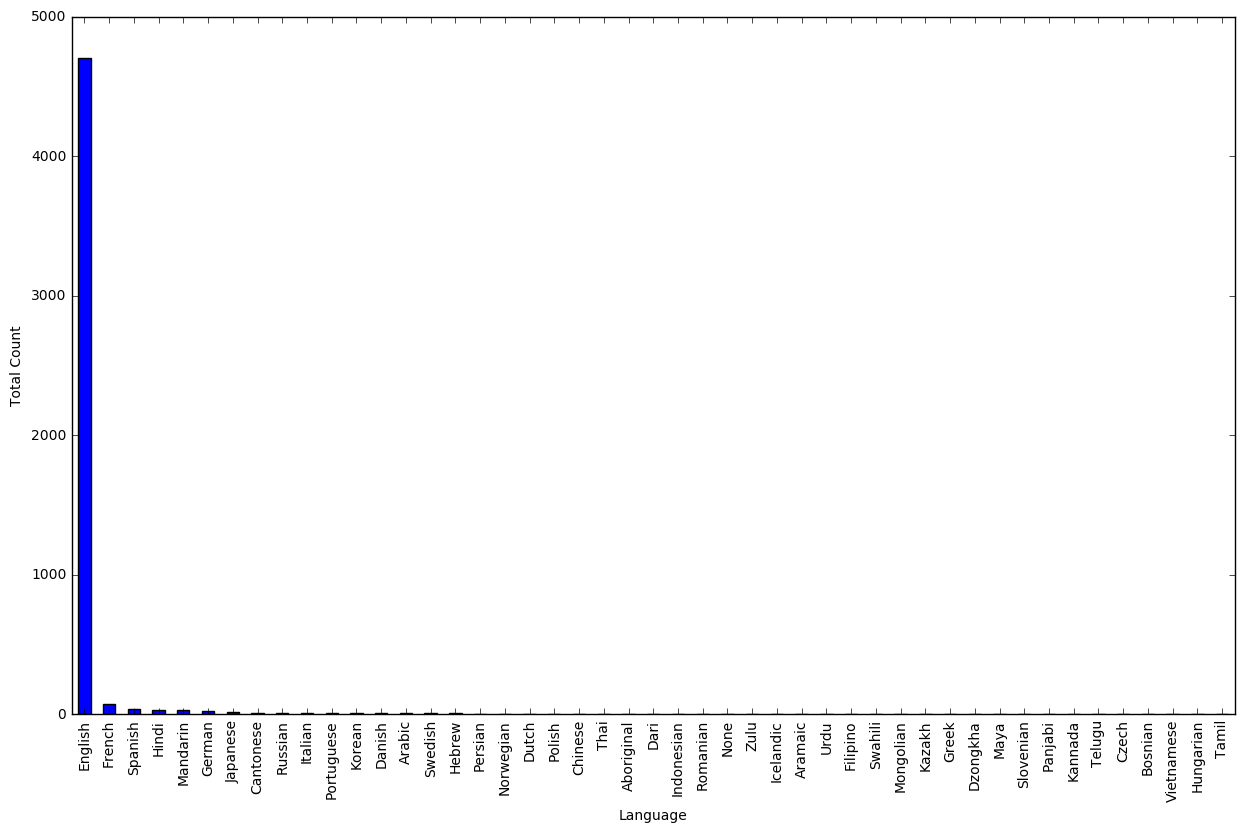

In [167]:
plt.figure(figsize=(15,9))
df['language'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Total Count')

### Bar Plot for Title Year

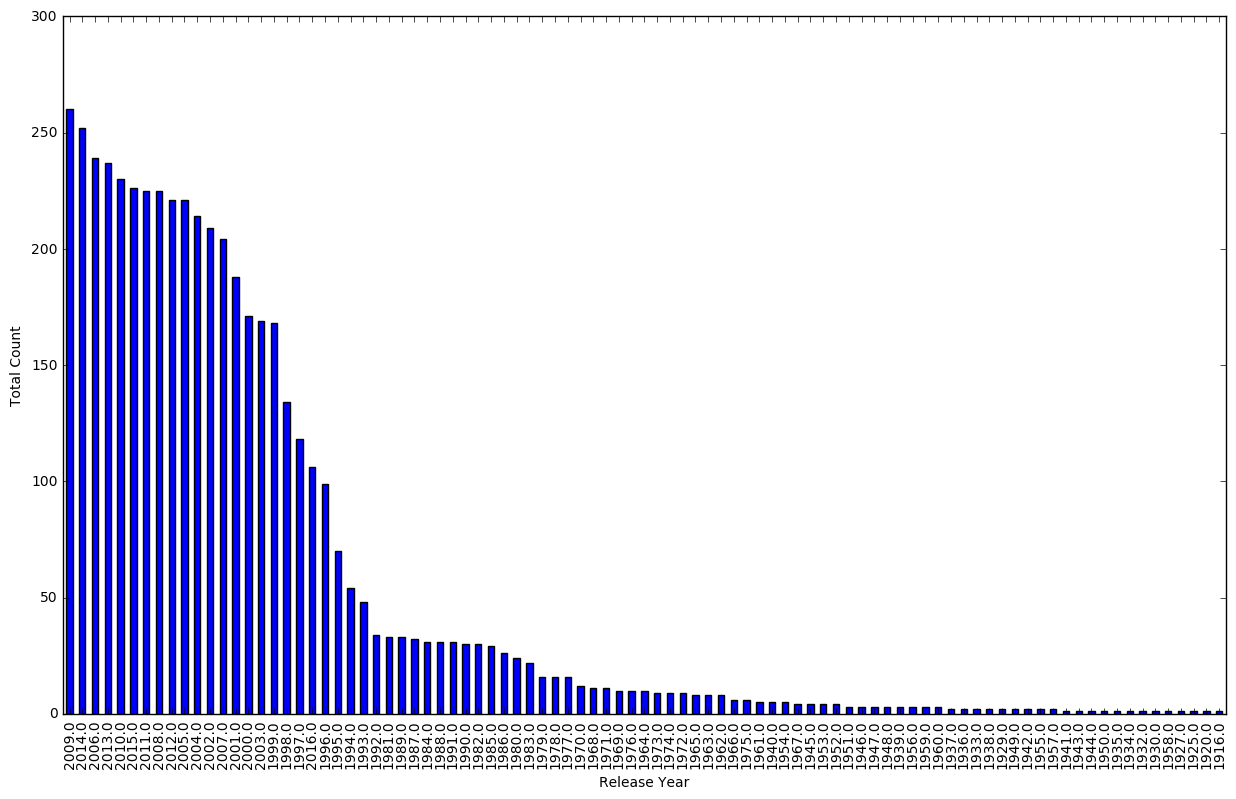

In [168]:
plt.figure(figsize=(15,9))
df['title_year'].value_counts().plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Total Count')
plt.show()

### Histogram for Title year

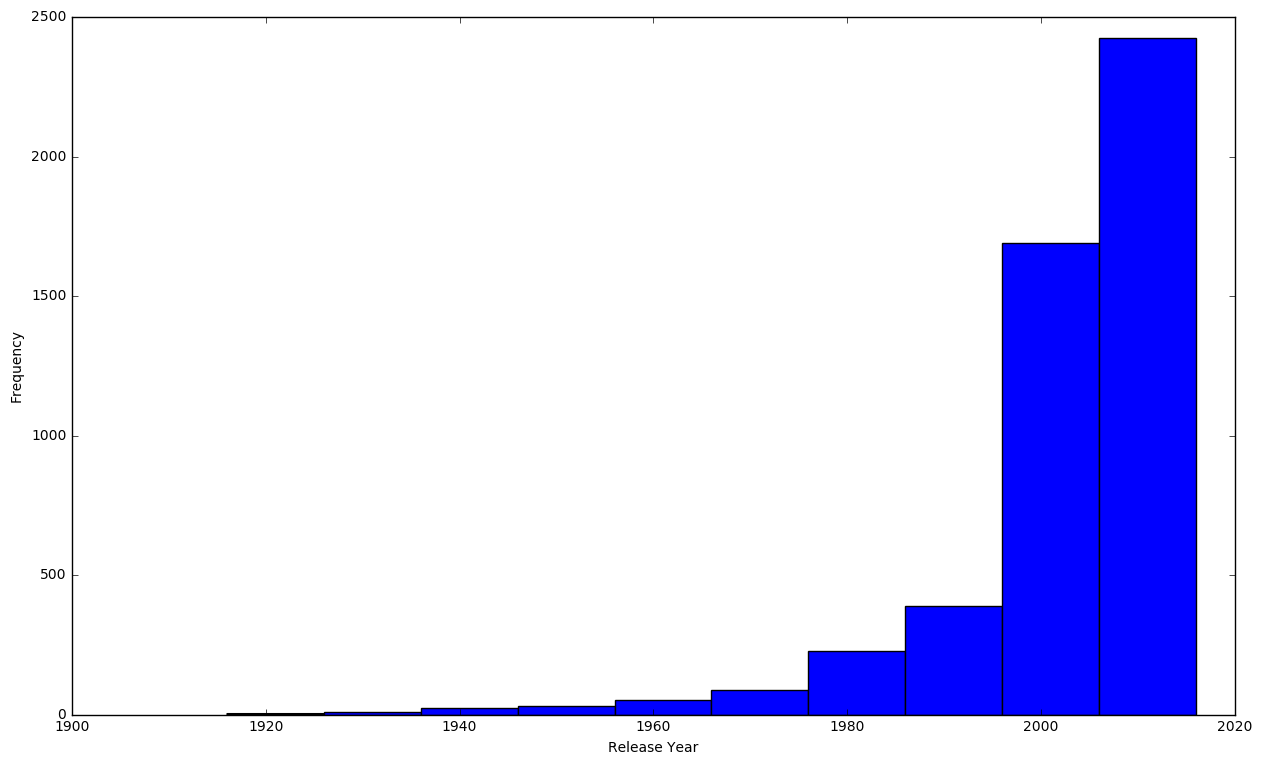

In [169]:
plt.figure(figsize=(15,9))
df['title_year'].plot(kind='hist')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

So as you can see not always histogram are good way of describing the data, as in this case barplot gives better summary of the data than the histogram.

These are the sample visualizations of some of the variables from the dataset.

Also if you see the histogram for the IMDB score, it's pretty much centered around 7 which just might make the model  classification(prediction) skewed to towards a score of 7. In order to have a meaningful learning for the model we can change the parameter or feature and see if it affects the score. Any feature which makes the change in model learnt would be considered as most informative. For remaining features, that we have, like duration won't make any difference in the model's learning or nor be informative.